# PART3 パラメータをチューニングしてみよう

## おまじない

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv")

In [4]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [6]:
trainX = train.iloc[:,0:17]

## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [7]:
y=train["y"]

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [11]:
testX = test.copy()
testX

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,18079,30,management,married,tertiary,no,32,yes,no,unknown,6,may,122,3,-1,0,unknown
18079,18080,35,management,married,tertiary,no,1557,yes,yes,cellular,5,feb,225,1,268,1,failure
18080,18081,33,housemaid,married,primary,no,1713,yes,no,unknown,8,may,22,1,-1,0,unknown
18081,18082,37,blue-collar,married,secondary,no,-251,yes,no,cellular,12,may,146,3,370,1,failure


## trainXとtestXをダミー変数化しましょう

In [12]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [14]:
clf1 = DT(max_depth=2,min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [16]:
cross_validate(clf1,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1)

{'fit_time': array([0.16655469, 0.18661141, 0.18551326, 0.16655469, 0.15662551]),
 'score_time': array([0.03068471, 0.02287698, 0.02620649, 0.03068471, 0.01200056]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73707281, 0.75910043])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [17]:
clf2 =DT(max_depth=10,min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [18]:
cross_validate(clf2,trainX,y,cv=5,scoring="roc_auc",n_jobs=-1)

{'fit_time': array([0.49949169, 0.48042583, 0.46999884, 0.46845889, 0.30994892]),
 'score_time': array([0.02381945, 0.03191185, 0.0239346 , 0.0310328 , 0.02091193]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.8924153 , 0.88343681])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [19]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [ ]:
parameters ={"max_depth":[2,3,4,5,6,7,8,9,10]}

In [22]:
parameters ={"max_depth":list(range(2,11))}

In [23]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [35]:
gcv = GridSearchCV(clf3,parameters,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)
gcv.fit(trainX,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [37]:
gcv.cv_results_

{'mean_fit_time': array([0.17651815, 0.26242223, 0.29473467, 0.36482577, 0.40684872,
        0.48802757, 0.6547092 , 0.77622619, 0.79409833]),
 'std_fit_time': array([0.01685433, 0.01573722, 0.00667046, 0.02281242, 0.01615448,
        0.01908676, 0.05513595, 0.02947722, 0.10438239]),
 'mean_score_time': array([0.02281065, 0.02691054, 0.02406139, 0.02480578, 0.02417583,
        0.02260871, 0.03089566, 0.03232203, 0.02771649]),
 'std_score_time': array([0.00261323, 0.00577686, 0.00363156, 0.00600242, 0.00491398,
        0.0026706 , 0.00755568, 0.00779488, 0.00882383]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [38]:
train_score = gcv.cv_results_["mean_train_score"]

In [39]:
test_score = gcv.cv_results_["mean_test_score"]

In [41]:
train_score

array([0.74831988, 0.8124462 , 0.84413528, 0.85726064, 0.86924573,
       0.88594739, 0.89900448, 0.91022975, 0.92419882])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x146a5f7f700>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

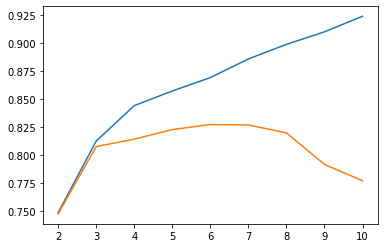

In [43]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks([0,1,2,3,4,5,6,7,8,],[2,3,4,5,6,7,8,9,10])

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [45]:
gcv.best_params_

{'max_depth': 6}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [61]:
pred = gcv.predict_proba(testX)

In [62]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [63]:
pred

array([0.6609589 , 0.45248869, 0.01968037, ..., 0.01968037, 0.01968037,
       0.01968037])

In [64]:
sample

,1,0.236
0,2,0.128
1,3,0.903
2,4,0.782
3,5,0.597
4,6,0.555
...,...,...
18077,18079,0.981
18078,18080,0.461
18079,18081,0.010
18080,18082,0.472


In [77]:
sample = pd.read_csv("submit_sample.csv",header=None)
sample


,0,1
0,1,0.236
1,2,0.128
2,3,0.903
3,4,0.782
4,5,0.597
...,...,...
18078,18079,0.981
18079,18080,0.461
18080,18081,0.010
18081,18082,0.472


In [78]:
sample[1] = pred

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [79]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [116]:
parameters2 = {"max_depth":list(range(2,11)),"min_samples_leaf":[5,10,20,50,100,500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [117]:
gcv2 = GridSearchCV(clf4,parameters2,cv=5,scoring="roc_auc",n_jobs=-1,return_train_score=True)
gcv2.fit(trainX,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc')

4.最適なパラメータはなんだったか確かめてみよう

In [118]:
gcv2.cv_results_

{'mean_fit_time': array([0.26467986, 0.22706676, 0.27050681, 0.25716953, 0.2309175 ,
        0.26120057, 0.29085469, 0.23915243, 0.26046414, 0.24383082,
        0.26957488, 0.29173074, 0.29676533, 0.31454287, 0.29887376,
        0.33689871, 0.32866235, 0.3701252 , 0.48049774, 0.48328624,
        0.49304814, 0.38905916, 0.36927586, 0.32454219, 0.42556496,
        0.39839396, 0.41244535, 0.41291542, 0.40935221, 0.47589459,
        0.60941763, 0.61011376, 0.5034143 , 0.45143709, 0.43534474,
        0.46871824, 0.51930723, 0.52726188, 0.52611661, 0.66277061,
        0.64908223, 0.5471241 , 0.58981886, 0.57980566, 0.54985929,
        0.55726185, 0.53650603, 0.48958011, 0.78635983, 0.84248123,
        0.72523355, 0.60706649, 0.55785079, 0.42273459]),
 'std_fit_time': array([0.01714927, 0.02290254, 0.02830347, 0.01471525, 0.02565719,
        0.02014322, 0.03120007, 0.01606385, 0.01312205, 0.0140517 ,
        0.05180264, 0.01586268, 0.01504871, 0.02346185, 0.01788124,
        0.00561467, 0.012

In [119]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [120]:
pred2 = gcv.predict_proba(testX)

In [121]:
pred2 = pred2[:,1]

In [122]:
sample[1] = pred2

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [123]:
sample.to_csv("submit4_bank.csv",header=None,index=None)